<a href="https://colab.research.google.com/github/arnavvats/fastai_dl_practice/blob/master/dog_classifier_fastai_dl_lec1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we will explore image classification using fastai library on classification of dog breeds.

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

If you are running this code on a small GPU, you can run out of memory. Set a smaller batch size in this case.

In [0]:
bs = 64

# Looking at the data
We are going to use the Oxford-IIIT Pet Dataset which features 12 cat breeds and 25 dog breeds. Our model will need to learn to differentiate between these 37 distinct categories.

At the time , the highest accuracy achieved was 59.21%, in 2012.

Let us use deep learning and find out the accuracy of modern day deep-learning algorithms.

First we will use the fastai untar_data function to download our dataset. The fastai library consists of a list of standard datasets, which can be passed to the untar_data function.


In [2]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

The first step is to look at the data. We always need to understand the problem and what the data looks like before we can figure out how to solve it.

Lets take a look at the labels. In this particular dataset, the labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, fastai library has a handy function made exactly for this, ```ImageDataBunch.from_name_re```, it gets the labels from filenames using regular expressions.



In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_151.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_160.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_94.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_98.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_31.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(), size = 224, bs=bs).normalize(imagenet_stats)

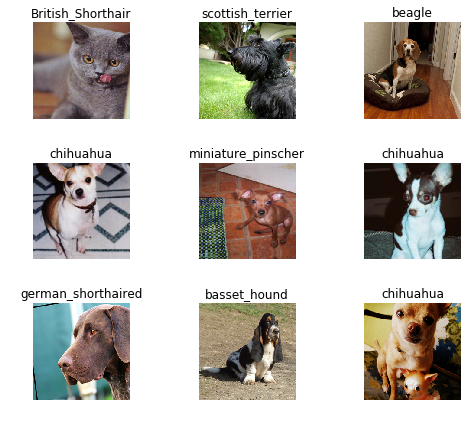

In [0]:
data.show_batch(rows = 3, figsize=(7, 6))

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

# Training: resnet34

Now we will start training our model . First we will use a pretrained resnet34 from the fastai library.

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.389558,0.332558,0.096076,01:16
1,0.571066,0.226385,0.076455,01:16
2,0.343257,0.207147,0.070365,01:15
3,0.255735,0.202046,0.066982,01:14


In [0]:
learn.save('stage-1')

## Results


Lets see the results we have got.


We will check the confusion matrix and plot top losses to see if the mistakes made by the model are general or anamolic.

We can see the top losses are in the augmented images with flares and the categories confused are resembling.

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds) ==len(losses)==len(idxs)

True

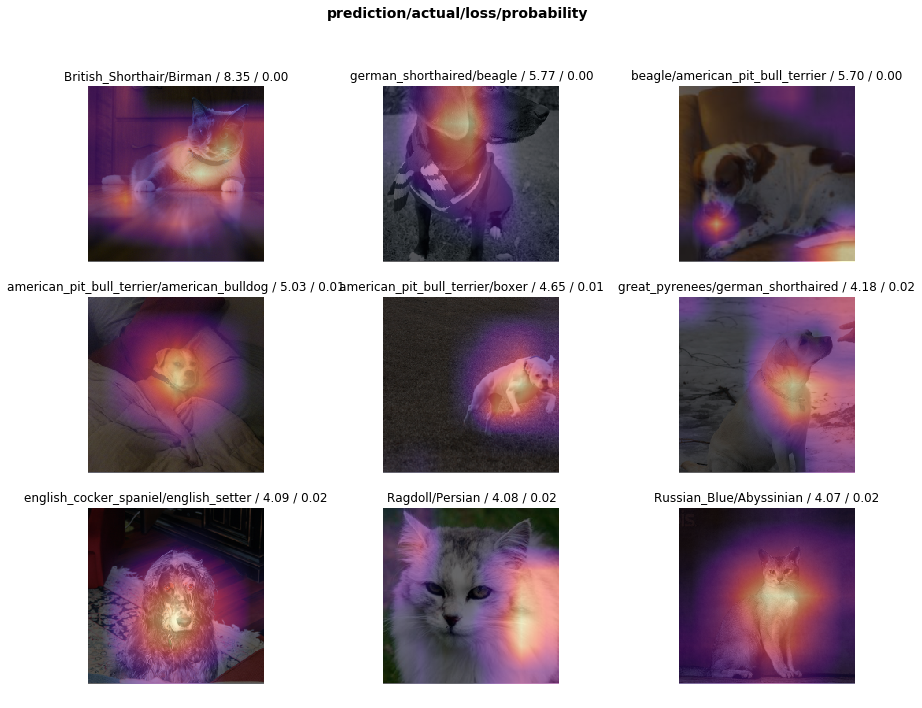

In [0]:
interp.plot_top_losses(9, figsize = (15, 11))

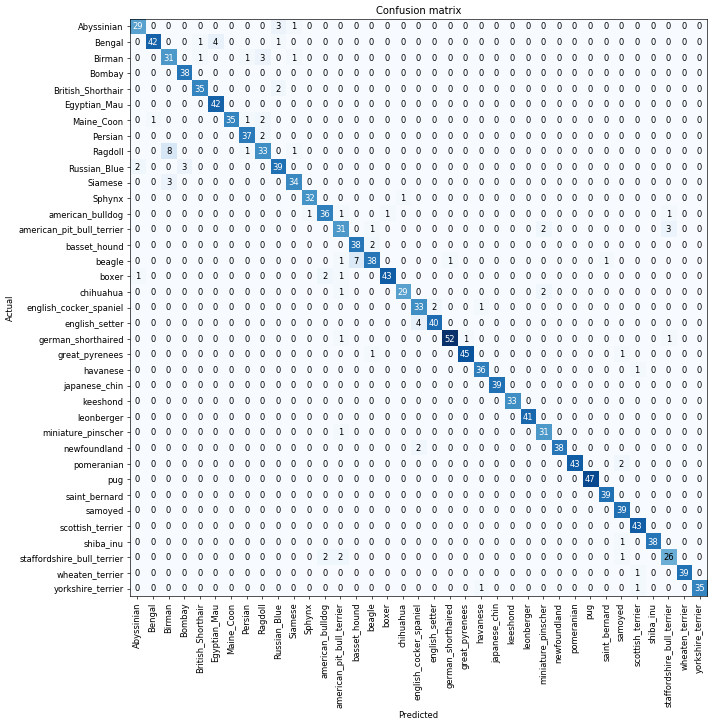

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi = 60)

In [0]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 8),
 ('beagle', 'basset_hound', 7),
 ('Bengal', 'Egyptian_Mau', 4),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('Abyssinian', 'Russian_Blue', 3),
 ('Birman', 'Ragdoll', 3),
 ('Russian_Blue', 'Bombay', 3),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'Ragdoll', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('english_cocker_spaniel', 'english_setter', 2),
 ('newfoundland', 'english_cocker_spaniel', 2),
 ('pomeranian', 'samoyed', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

## Unfreeze, fine-tuning and learning rates


Since our model is working as expected, we will unfreeze our model and train more.

In our previous model, the initial layers of the resnet were pretrained with some weights and only the final layer was trained. We get a good approximation because the initial layers activate the smaller features which are general in normal images while later layers form the bigger picture.

Unfreezing the model means we will trian the entire model.

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.520898,0.306714,0.098106,01:17


Fastai provides us with a function to find the optimal learning rate range to train the model.

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


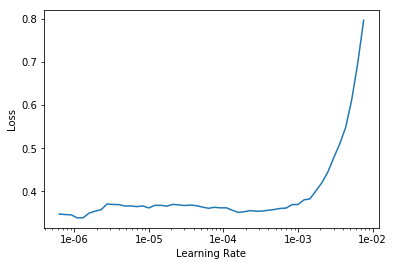

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.317798,0.248544,0.079838,01:18
1,0.273636,0.240166,0.077808,01:17


# Training: resnet50

Now we use the 50-layer model, ResNet50 which should perform better because of more no. of layers as well as a better architecture. We will reduce the batch size because training this model will take a lot of GPU memory.

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(), size = 299, bs = bs // 2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 165489778.42it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


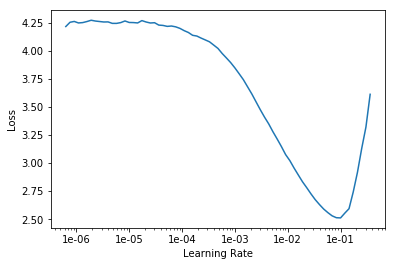

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.751689,0.273906,0.081191,02:05
1,0.431119,0.272203,0.096752,02:05
2,0.342528,0.213875,0.072395,02:05
3,0.276175,0.212582,0.066982,02:05
4,0.210098,0.191017,0.059540,02:06
5,0.151544,0.161353,0.058187,02:06
6,0.107997,0.158040,0.052774,02:05
7,0.109036,0.148453,0.050744,02:05


In [0]:
learn.save('stage-1-50')

The error rate for pre-trained resnet50 has significantly decreased compared to fully-trained resnet34.
Lets try to full-train the resnet50.

In [0]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.070306,0.152449,0.051421,02:17
1,0.076124,0.158956,0.050744,02:15
2,0.071506,0.161986,0.051421,02:15
3,0.055804,0.157128,0.052097,02:15
4,0.051242,0.155535,0.052774,02:15
5,0.041633,0.150176,0.050068,02:16
6,0.035873,0.155482,0.052774,02:15
7,0.044391,0.145975,0.050068,02:15


If the error rate does not seem to imporve, we can go back to our previous model, or increase the no. of epochs.

In [0]:
# learn.load('stage-1-50');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val = 2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_bulldog', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('Siamese', 'Birman', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('Ragdoll', 'Persian', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('basset_hound', 'beagle', 3),
 ('Birman', 'Ragdoll', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('boxer', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2)]

# Other data fromats

Lets use an MNIST sample to play with different methods on how we can train our datausing different methods.
The MNIST sample contains some images labelled 3 or 7 only.

In [0]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

For data augmentation, we disable flipping because we are working on digits and flipping would mean a different class for flipped digits.

In [0]:
tfms = get_transforms(do_flip = False)
data = ImageDataBunch.from_folder(path, ds_tfms = tfms, size = 26)

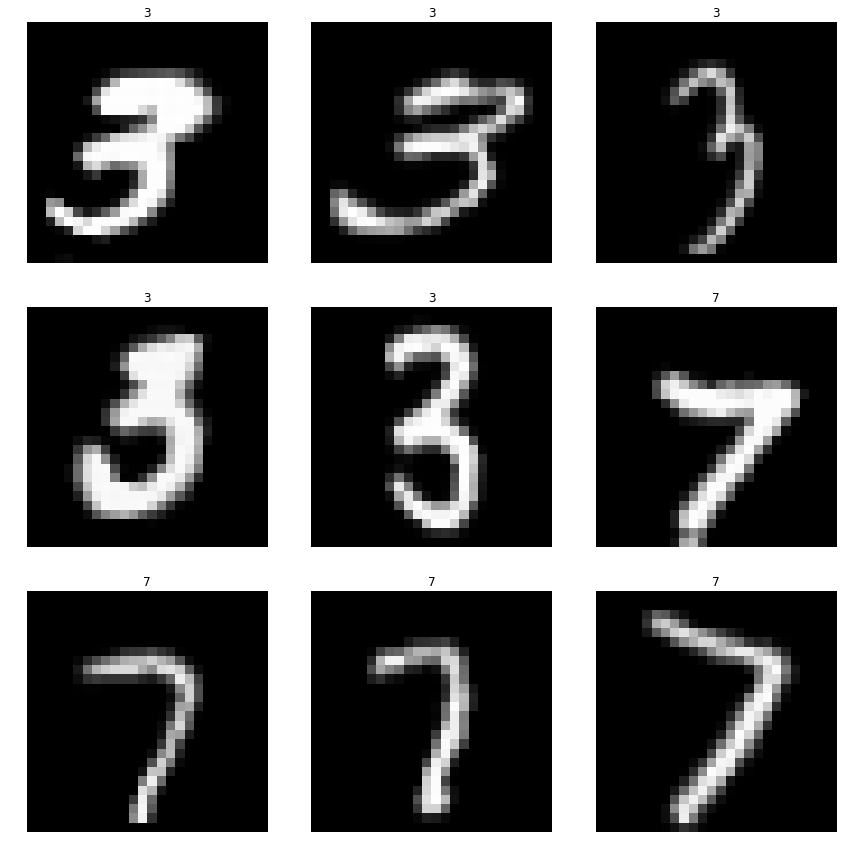

In [0]:
data.show_batch(rows = 3, fig_size = (7,6))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.129019,0.049874,0.983808,00:18
1,0.072644,0.032096,0.988224,00:17


In [0]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms = tfms, size = 28)

[0, 1]

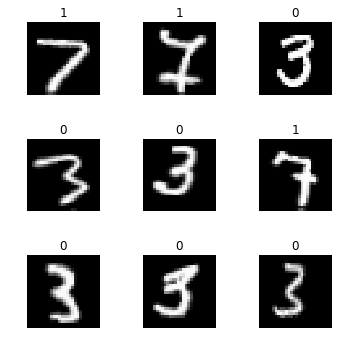

In [0]:
data.show_batch(rows = 3, figsize = (5,5))
data.classes

In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms = tfms, size = 28)
data.classes

[0, 1]

In [0]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [0]:
pat = r'/(\d)/\d+\.png$'
data = ImageDataBunch.from_name_re(path, fn_paths, pat = pat, ds_tfms = tfms, size = 24)
data.classes

['3', '7']

In [0]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels = labels, ds_tfms = tfms, size = 24)
data.classes

['3', '7']

# Using tensorflow on Pet Classification

Let us try to use tensorflow and keras on the same dataset.

This notebook has been run on GPU acceleration in PyTorch and will use TPU in tensorflow since PyTorch does not support GPU as of now.

We will compare the performance of TPUs in general as opposed to GPUs.


In [11]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [3]:
import os
import tensorflow as tf
import keras
import re
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.


In [4]:
image_list = os.listdir(str(path/'images'))
label_dict = dict()
counter = 0
for image in image_list:
  reg = re.match('([^/]+)_\d+.jpg$', image)
  if not reg:
    print(image)
    os.remove(str(path/'images'/image))
  else:
    category = reg.groups()[0]
    if category not in label_dict:
      label_dict[category] = counter
      counter += 1
len(label_dict)

37

In [0]:
def get_input(image_name):
  try:
    img = cv2.imread(str(path/'images'/image_name))
    res = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  except:
    print('Error in image {}'.format(image_name))
    res = None
  return res

def get_output(image_name):
  reg = re.match('([^/]+)_\d+.jpg$', image)
  return label_dict[reg.groups()[0]]

In [6]:
print('Total {} images'.format(len(image_list)))
def image_generator(image_list = image_list, label_dict = label_dict, batch_size = 64):
  batch_input = []
  batch_output = [] 
  
  # Read in each input, perform preprocessing and get labels
  for index, image in enumerate(image_list):
      if index % 100 == 0:
        print('processing index {}'.format(index))
      input = get_input(image)
      output = get_output(image)
      if input is not None:
        batch_input += [ input ]
        batch_output += [ output ]
      # Return a tuple of (input,output) to feed the network
  batch_x = np.array( batch_input )
  batch_y = np.array( batch_output )
  return (batch_x, batch_y)

batch_x, batch_y = image_generator()

Total 7390 images
processing index 0
processing index 100
processing index 200
processing index 300
processing index 400
Error in image Egyptian_Mau_177.jpg
processing index 500
processing index 600
processing index 700
processing index 800
processing index 900
processing index 1000
processing index 1100
Error in image Egyptian_Mau_167.jpg
processing index 1200
processing index 1300
processing index 1400
processing index 1500
processing index 1600
Error in image Abyssinian_34.jpg
processing index 1700
processing index 1800
processing index 1900
processing index 2000
processing index 2100
processing index 2200
processing index 2300
processing index 2400
processing index 2500
processing index 2600
processing index 2700
processing index 2800
processing index 2900
processing index 3000
processing index 3100
processing index 3200
processing index 3300
processing index 3400
processing index 3500
processing index 3600
processing index 3700
processing index 3800
Error in image Egyptian_Mau_139

In [7]:
x_train = batch_x
batch_y = batch_y.reshape((batch_y.shape[0], 1))
y_train = np.zeros((batch_y.shape[0], 37))
y_train[batch_y] = 1
print(x_train.shape, y_train.shape)


(7384, 224, 224, 3) (7384, 37)


In [8]:
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model

base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(224, 224, 3))

def build_finetune_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x) 
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x) 
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model

finetune_model = build_finetune_model(base_model, 
                                      dropout=0.5, 
                                      fc_layers=[1024, 1024], 
                                      num_classes= 37)

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
from keras.optimizers import SGD, Adam
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale = 1./255,
    horizontal_flip=True)

model = finetune_model
adam = Adam(lr=0.001)
model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 20/230 [=>............................] - ETA: 41:44 - loss: 0.0000e+00 - acc: 0.0078

KeyboardInterrupt: ignored